In [1]:
import numpy as np

In [32]:
class MultiplyGate(object):
    def __init__(self, x, y):
        self.x=x
        self.y=y
        
    def forward(self):
        z=self.x * self.y
        return z
    
    def backward(self,dz):
        dx=self.y * dz
        dy=self.x * dz
        return [dx, dy]
    

    

In [33]:
mul=MultiplyGate(4,5)

In [34]:
print mul.forward()

20


In [37]:
print mul.backward(1)

[5, 4]


In [65]:
D=np.random.randn(1000, 500)
hidden_layer_sizes = [500]*10
nonlinearties=['tanh']*len(hidden_layer_sizes)

In [66]:
act={'relu':lambda x:np.maximum(0,x), 'tanh':lambda x:np.tanh(x)}
Hs = {}
for i in range (len(hidden_layer_sizes)):
    X = D if i == 0 else Hs[i-1]
    fan_in=X.shape[1]
    fan_out=hidden_layer_sizes[i]
    W=np.random.randn(fan_in,fan_out) * 1.0
    H=np.dot(X,W)
    H=act[nonlinearties[i]](H)
    Hs[i] = H
    



In [67]:
print 'input layer had mean %f and std %f' % (np.mean(D),np.std(D))


input layer had mean -0.000498 and std 1.000140


In [68]:
layer_means = [np.mean(H) for i,H in Hs.iteritems()]
layer_stds = [np.std(H) for i,H in Hs.iteritems()]

for i,H in Hs.iteritems():
    print 'hidden layer %d had mean %f and std %f'% (i+1,layer_means[i],layer_stds[i])


hidden layer 1 had mean -0.000549 and std 0.981834
hidden layer 2 had mean -0.000534 and std 0.981720
hidden layer 3 had mean 0.000773 and std 0.981462
hidden layer 4 had mean -0.000435 and std 0.981819
hidden layer 5 had mean 0.000877 and std 0.981494
hidden layer 6 had mean -0.000982 and std 0.981732
hidden layer 7 had mean 0.000378 and std 0.981871
hidden layer 8 had mean -0.000680 and std 0.981504
hidden layer 9 had mean 0.002739 and std 0.981531
hidden layer 10 had mean 0.002395 and std 0.981628


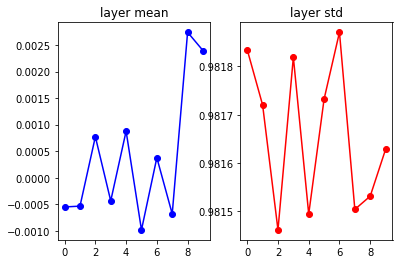

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.subplot(121)
plt.plot(Hs.keys(), layer_means, 'ob-')
plt.title('layer mean')
plt.subplot(122)
plt.plot(Hs.keys(), layer_stds, 'or-')
plt.title('layer std')


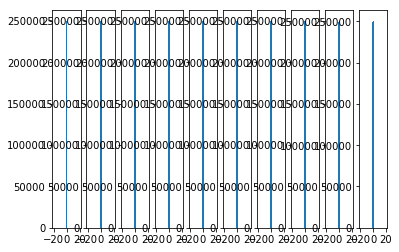

In [73]:
plt.figure()
for i,H in Hs.iteritems():
    plt.subplot(1,len(Hs),i+1)
    plt.hist(H.ravel(), 30, range=(-1,1))

In [74]:
def init_two_layer_model(input_size, hidden_size, output_size):
    model={}
    model['w1'] = 0.0001 * np.random.randn(input_size, hidden_size)
    model['b1'] = np.zeros(hidden_size)
    model['w2'] = 0.0001 * np.random.randn(hidden_size, output_size)
    model['b2'] = np.zeros(output_size)
    
    return model

In [75]:
model=init_two_layer_model(32*32*3, 50, 10)


In [84]:
trainer=ClassifierTrainer()


NameError: name 'ClassifierTrainer' is not defined